# Gradient Boosting Machines Algorithm
### Introduction
- Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression.

- Ensembels are constructed from decision tree models. Trees are added one at a time to the model and fit to correct the prediction errors made by the prior model.

- Models aer fit using differentiable loss function and greaident descent optimization algorithm. This is why it is called 'graident boosting'.

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.datasets import make_classification, make_regression
import seaborn as sns
import matplotlib.pyplot as plt

# function to create dataset
def make_data(regression=False):
    if regression==True:
        X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
    else:
        X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return (X, y)

In [47]:
x, y = make_data()

### Gradient Boosting for classification

In [48]:
model = GradientBoostingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean accuracy: {:.3f}({:.3f})'.format(np.mean(n_scores),np.std(n_scores)))

Mean accuracy: 0.899(0.030)


In [49]:
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

### Gradient Boosting for regression

In [50]:
x, y = make_data(regression=True)
model=GradientBoostingRegressor()
cv= RepeatedKFold(n_splits=19, n_repeats=3, random_state=1)

In [51]:
n_scores = cross_val_score(model, x,y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('MAE: {:.3f}({:.3f})'.format(np.mean(n_scores),np.std(n_scores)))

MAE: -61.725(6.462)


# Tuning Hyperparameters 

- There are four big groups of hyperparameters for gradient boosting model.

    - The number of models: n_estimators
    - The learning rate of each tree in model
    - the samples that used to train
    - the depth of each tree

## explore the number of Trees
- n_estimators = 100 default

In [52]:
score_list = []
x,y = make_data()

def evaluation(model, x,y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x ,y, scoring='accuracy',cv=cv, n_jobs=-1)
    return scores

estimators = [10,50,100,500,1000,5000]
for trees in estimators:
    scores = evaluation(GradientBoostingClassifier(n_estimators=trees), x ,y)
    score_list.append(scores)

In [66]:
score_df = pd.DataFrame(score_list)
score_df = score_df.T
score_df.columns = estimators
score_df.plot.box()

## Explore number of samples : 'subsample'

- The number of samples used to fit each tree can be varied. Each tree is fit on a randomly selected subset of the training dataset.
- Using fewer samples introduces more variance for each tree and improve the oversall performance of the model.
- 'subsample' can be set to a fraction of the training dataset size. default = 1.0

In [82]:
score_list = []
subsample_rate = np.arange(0.1,1.1,0.1)
x,y = make_data()

for sample_rate in subsample_rate:
    scores = evaluation(GradientBoostingClassifier(subsample=sample_rate, random_state=42), x ,y)
    score_list.append(scores)

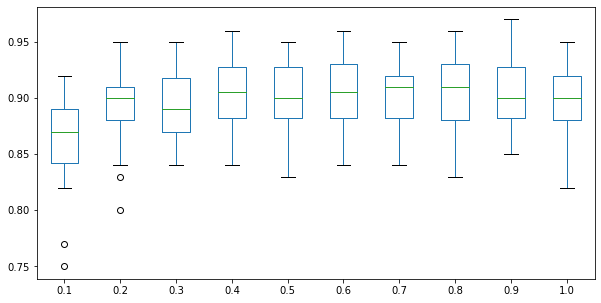

In [106]:
score_df = pd.DataFrame(score_list)
score_df = score_df.T
score_df.columns = subsample_rate.round(1)
score_df.plot.box(figsize=(10,5))

## Explore number of features - max_features
- The number of features used to fit tree can be varied
- changing the number of features introduces additional variance into the model, which may improve performance


In [107]:
score_list = []
features = list(range(1,21))
x,y = make_data()

for feature in features:
    scores = evaluation(GradientBoostingClassifier(max_features=feature, random_state=42), x ,y)
    score_list.append(scores)

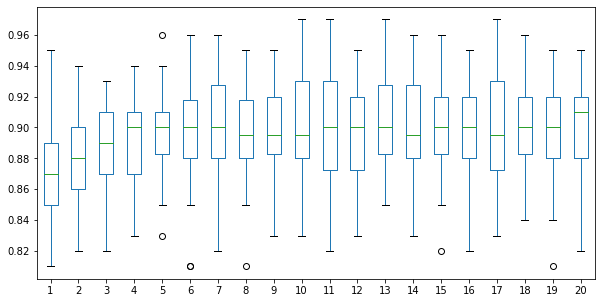

In [108]:
score_df = pd.DataFrame(score_list)
score_df = score_df.T
score_df.columns = features
score_df.plot.box(figsize=(10,5))

## Explore learning rate
- The amount of contribution that each model has on the ensemble prediction
- smaller rate require more decision trees. large rate require fewer trees.
- It is common to explore learning rate values on a log scale, such as 0.0001 to 1.0
- default is 0.1

In [109]:
score_list = []
learning_rate = [0.0001,0.001,0.01,0.1,1]
x,y = make_data()

for rate in learning_rate:
    scores = evaluation(GradientBoostingClassifier(learning_rate=rate, random_state=42), x ,y)
    score_list.append(scores)

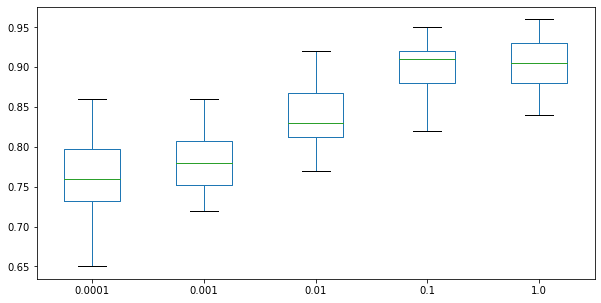

In [110]:
score_df = pd.DataFrame(score_list)
score_df = score_df.T
score_df.columns = learning_rate
score_df.plot.box(figsize=(10,5))

- This highlights the trade-off between the number of trees (speed of training) and learning rate, 
- Bacause we can fit a model faster by using fewer trees and a larger learning rate.

## Explore the Tree Depth
- tree depth controls how specialized each tree is: how general or overfit it might be.
- Gredient boosting performs well with trees that have a modest depth find a balance between skill and gernality.
- 'max_depth' defaults to 3.

In [112]:
score_list = []
tree_depth = list(range(1,11)) 
x,y = make_data()

for depth in tree_depth:
    scores = evaluation(GradientBoostingClassifier(max_depth=depth, random_state=42), x ,y)
    score_list.append(scores)

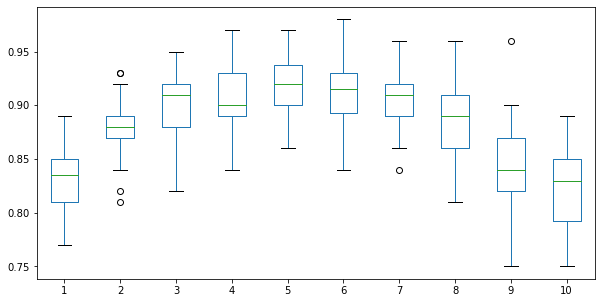

In [113]:
score_df = pd.DataFrame(score_list)
score_df = score_df.T
score_df.columns = tree_depth
score_df.plot.box(figsize=(10,5))

# Using GridSearch for hyperparameters

Four key hyperparameters:
1. number of trees : n_estimators
2. Learning rate
3. Subsample size: sub_sample
4. Maximum depth: max_depth
    

In [114]:
params = {
    'n_estimators':[10,50,100,500],
    'learning_rate':[0.0001,0.001,0.01,0.1,1],
    'subsample':[0.5,0.7,1],
    'max_depth':[3,7,9]
}
x ,y = make_data()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, params, cv=cv, n_jobs=-1, verbose=1,scoring='accuracy')
grid_result = grid_search.fit(x,y)

Fitting 30 folds for each of 180 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 332 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 582 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1498 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 2048 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 2790 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 3624 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 4566 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 40.3min finished


In [116]:
print('Best mark:',grid_result.best_score_, '\nBest params:',grid_result.best_params_)

Best mark: 0.9473333333333332 
Best params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.7}


In [117]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [118]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.525333 (0.076058) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.524333 (0.073742) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.524000 (0.072874) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1}
0.772000 (0.041344) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}
0.771333 (0.033639) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.738667 (0.049982) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1}
0.826000 (0.030067) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.817667 (0.038616) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.761000 (0.043077) with: {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
0.830667 (0.037411) with: {'learning_rate': 0.000